In [2]:
import pandas as pd
import numpy as np

In [3]:
df_1 = pd.read_csv('car_crash.csv', encoding='latin1')
data = pd.read_csv('traffic.csv')

In [11]:
df_1.head(2)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848


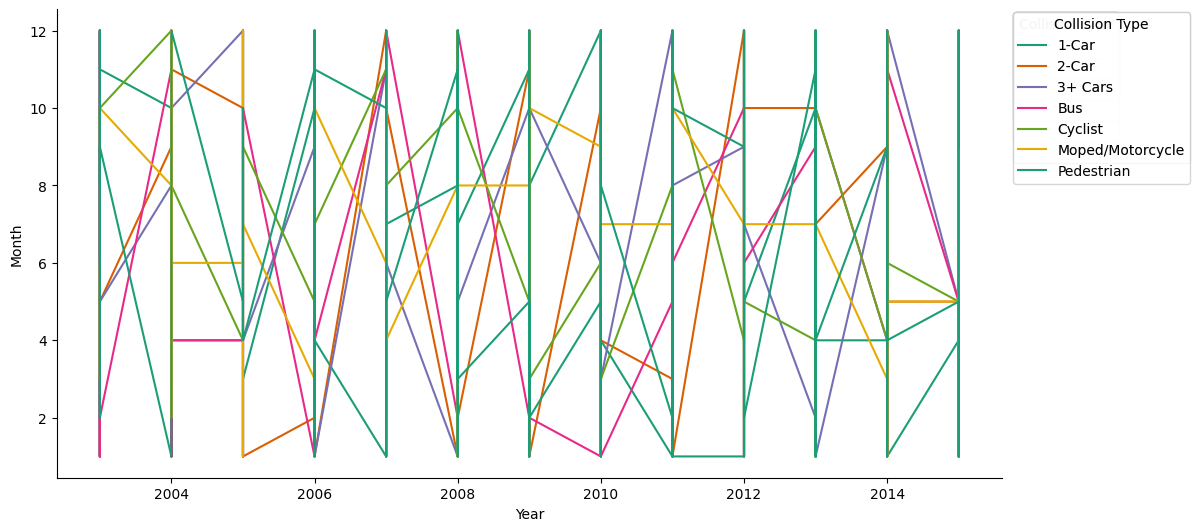

In [18]:
# @title Year vs Month

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Month']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_1.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Collision Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Collision Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Month')

In [13]:
df_1['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003])

In [12]:
data.head(2)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011


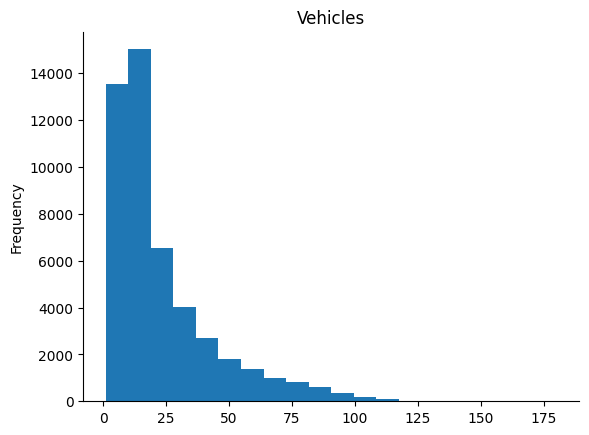

In [19]:
# @title Vehicles

from matplotlib import pyplot as plt
df_2['Vehicles'].plot(kind='hist', bins=20, title='Vehicles')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
data['DateTime']=pd.to_datetime(data['DateTime'])

data["Year"]=data['DateTime'].dt.year

data["Month"]=data['DateTime'].dt.month

data["Date_no"]=data['DateTime'].dt.day

data["Hour"]=data['DateTime'].dt.hour

data["Day"]= data['DateTime'].dt.strftime("%A")
data

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,Friday
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,Friday
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,Friday
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,Friday


In [7]:
data['Year'].unique()

array([2015, 2016, 2017], dtype=int32)

In [8]:
df1 = data[
    data['Year'] == 2015
][:4000]

In [9]:
df2 = df_1[
    df_1['Year'] == 2015
][:4000]

In [10]:
df1.shape, df2.shape

((4000, 9), (4000, 11))

In [11]:
df1.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'Year', 'Month', 'Date_no',
       'Hour', 'Day'],
      dtype='object')

In [12]:
df2.columns

Index(['Year', 'Month', 'Day', 'Weekend?', 'Hour', 'Collision Type',
       'Injury Type', 'Primary Factor', 'Reported_Location', 'Latitude',
       'Longitude'],
      dtype='object')

In [13]:
merged_df = pd.merge(df1, df2, how='outer', on='Year')


In [14]:
merged_df.head(4)

,DateTime,Junction,Vehicles,ID,Year,Month_x,Date_no,Hour_x,Day_x,Month_y,Day_y,Weekend?,Hour_y,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015-11-01,1,15,20151101001,2015,11,1,0,Sunday,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015-11-01,1,15,20151101001,2015,11,1,0,Sunday,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015-11-01,1,15,20151101001,2015,11,1,0,Sunday,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015-11-01,1,15,20151101001,2015,11,1,0,Sunday,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956


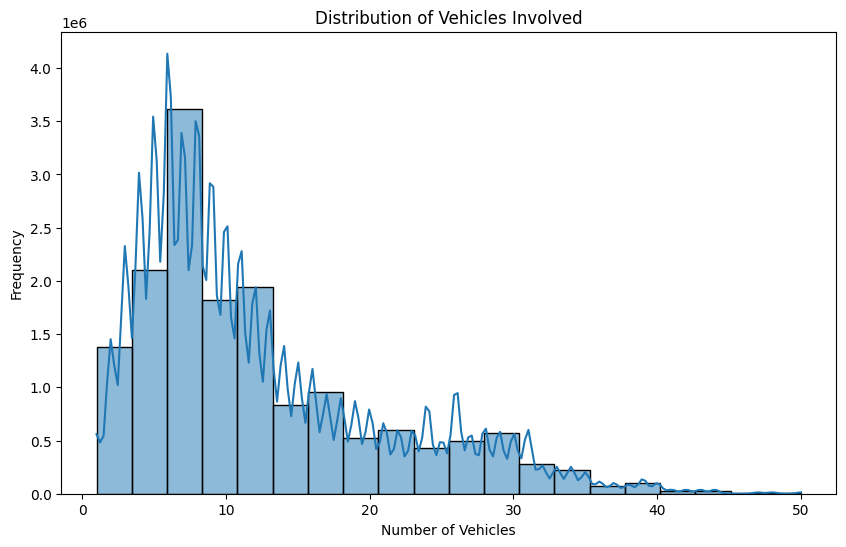

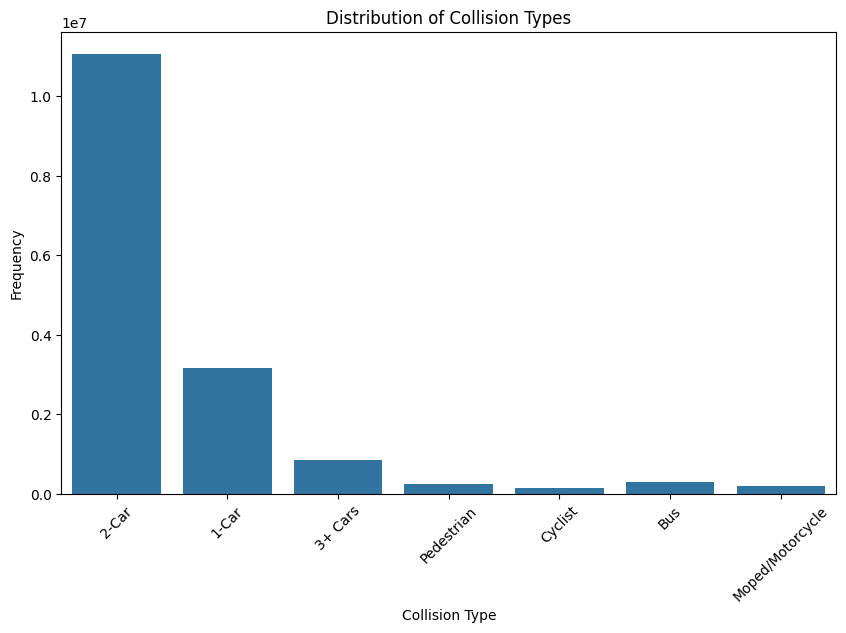

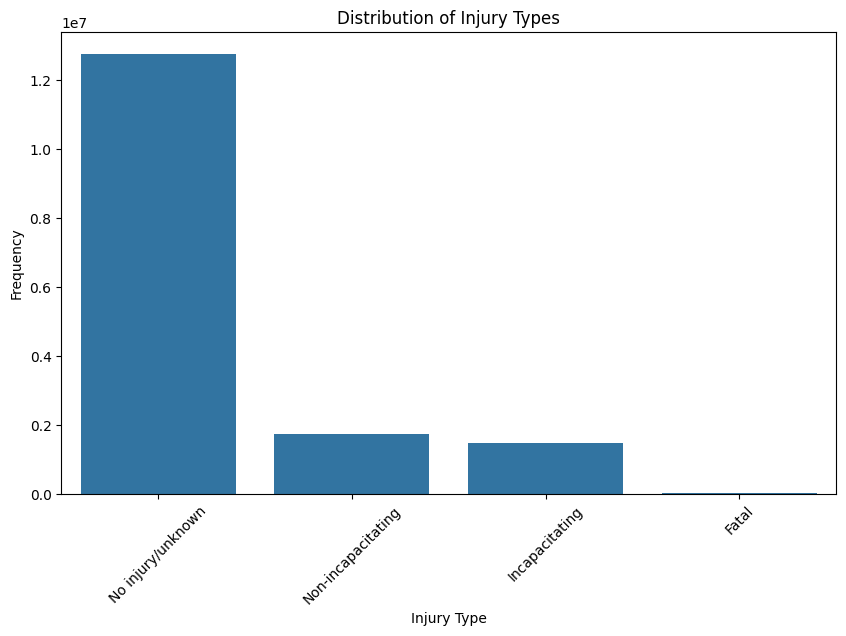

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and df2 are your two dataframes
# df1[['Year', 'Month', 'Day', 'Hour']] = df1[['Year', 'Month', 'Day', 'Hour']].astype(str)
# df2[['Year', 'Month', 'Day', 'Hour']] = df2[['Year', 'Month', 'Day', 'Hour']].astype(str)

# # Merge the two dataframes based on common columns
# merged_df = pd.merge(df1, df2, on=['Year', 'Month', 'Day', 'Hour'])

# Visualize the correlation between variables using a heatmap
# correlation = merged_df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# Visualize the distribution of vehicles involved in collisions
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Vehicles'], bins=20, kde=True)
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicles Involved')
plt.show()

# Visualize the collision types
plt.figure(figsize=(10, 6))
sns.countplot(x='Collision Type', data=merged_df)
plt.xticks(rotation=45)
plt.xlabel('Collision Type')
plt.ylabel('Frequency')
plt.title('Distribution of Collision Types')
plt.show()

# Visualize the injury types
plt.figure(figsize=(10, 6))
sns.countplot(x='Injury Type', data=merged_df)
plt.xticks(rotation=45)
plt.xlabel('Injury Type')
plt.ylabel('Frequency')
plt.title('Distribution of Injury Types')
plt.show()




In [38]:
merged_df

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day,Weekend?,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude


In [17]:
df = merged_df[:2000]

In [16]:
merged_df.to_csv('data.csv',index = False)

KeyboardInterrupt: 

In [18]:
df.to_csv('data_half.csv',index = False)